In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score

In [13]:
def RandomForest(df):
    X = df.drop('diagnostico', axis=1)
    y = df['diagnostico']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
    
    params_grid = {'bootstrap': [True, False],
                    'max_depth': [20, 40, 60, 80],
                    'max_features': [None, 'sqrt', 'log2'],
                    'min_samples_leaf': [1, 2, 4],
                    'min_samples_split': [2, 5, 10],
                    'n_estimators': [100, 200]}
    
    rf = RandomForestClassifier()
    grid_classifier = RandomizedSearchCV(estimator = rf, param_distributions = params_grid, n_iter = 100, cv = 5, verbose=0, random_state=42, n_jobs = -1)
    grid_classifier.fit(X_val, y_val)
    
    best_parameters = grid_classifier.best_params_
    
    model = RandomForestClassifier(**best_parameters)
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    
    test_accuracy = accuracy_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    ppv = precision_score(y_test, pred)
    sensit = recall_score(y_test, pred)
    specificity = cm[0,0] / (cm[0,0] + cm[0,1])
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, pred)
    print(f"F1-Score: {f1:.4f}")
    print(f"Acurácia: {test_accuracy:.4f}")
    print(f"PPV (Precision): {ppv:.4f}")
    print(f"Sensibilidade (Recall): {sensit:.4f}")
    print(f"Especificidade: {specificity:.4f}")
    print(f"AUC: {auc_score:.4f}")    
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test, pred))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Sem Sepse', 'Com Sepse'], yticklabels=['Sem Sepse', 'Com Sepse'])
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.title('Matriz de Confusão')
    plt.show()

In [12]:
def RandomForest_Over(df):
    X = df.drop('diagnostico', axis=1)
    y = df['diagnostico']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
    
    # Aplicar oversampling aleatório apenas nos dados de treino
    ros = RandomOverSampler(random_state=42)
    X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
    
    params_grid = {'bootstrap': [True, False],
                    'max_depth': [20, 40, 60, 80],
                    'max_features': [None, 'sqrt', 'log2'],
                    'min_samples_leaf': [1, 2, 4],
                    'min_samples_split': [2, 5, 10],
                    'n_estimators': [100, 200]}
    
    rf = RandomForestClassifier()
    grid_classifier = RandomizedSearchCV(estimator=rf, param_distributions=params_grid, n_iter=100, cv=5, verbose=0, random_state=42, n_jobs=-1)
    grid_classifier.fit(X_val, y_val)
    
    best_parameters = grid_classifier.best_params_
    
    model = RandomForestClassifier(**best_parameters)
    # Treinar o modelo com os dados balanceados
    model.fit(X_train_res, y_train_res)
    
    pred = model.predict(X_test)
    
    test_accuracy = accuracy_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    ppv = precision_score(y_test, pred)
    sensit = recall_score(y_test, pred)
    specificity = cm[0,0] / (cm[0,0] + cm[0,1])
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, pred)
    print(f"F1-Score: {f1:.4f}")
    print(f"Acurácia: {test_accuracy:.4f}")
    print(f"PPV (Precision): {ppv:.4f}")
    print(f"Sensibilidade (Recall): {sensit:.4f}")
    print(f"Especificidade: {specificity:.4f}")
    print(f"AUC: {auc_score:.4f}")  
        
    print(classification_report(y_test, pred))
    print(confusion_matrix(y_test, pred))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Sem Sepse', 'Com Sepse'], yticklabels=['Sem Sepse', 'Com Sepse'])
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.title('Matriz de Confusão')
    plt.show()

In [18]:
df_reg = pd.read_csv('df_regressao.csv')
df_reg.columns

Index(['patientunitstayid', 'gender', 'age', 'bands', 'CRP', 'ESR', 'temp',
       'lactate', 'WBC', 'lymphs', 'resp', 'spo2/fio2', 'pao2/fio2',
       'bicarbonate', 'heartRate', 'troponin', 'systolic', 'diastolic', 'MAP',
       'bloodUreaNitrogen', 'alanine', 'aspartate', 'bilirubin', 'hemoglobin',
       'iqr', 'platelets', 'PTT', 'fibrinogen', 'albumin', 'chloride',
       'glucose', 'sodium', 'gcs', 'potassium', 'calcium', 'phosphate',
       'magnesium', 'ethnicity_African American', 'ethnicity_Asian',
       'ethnicity_Caucasian', 'ethnicity_Hispanic',
       'ethnicity_Native American', 'ethnicity_Other/Unknown', 'diagnostico'],
      dtype='object')

In [19]:
df_reg = df_reg.drop(columns=['iqr','bands', 'fibrinogen', 'temp', 'CRP', 'ESR', 'gender', 'ethnicity_African American', 'ethnicity_Asian', 'ethnicity_Caucasian', 'ethnicity_Hispanic', 'ethnicity_Native American', 'ethnicity_Other/Unknown'])

F1-Score: 0.0000
Acurácia: 0.9926
PPV (Precision): 0.0000
Sensibilidade (Recall): 0.0000
Especificidade: 1.0000
AUC: 0.8412
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     18720
         1.0       0.00      0.00      0.00       139

    accuracy                           0.99     18859
   macro avg       0.50      0.50      0.50     18859
weighted avg       0.99      0.99      0.99     18859

[[18720     0]
 [  139     0]]


/home/vip/grad/23/leticia.ribeiro/miniconda3/envs/uti/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vip/grad/23/leticia.ribeiro/miniconda3/envs/uti/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vip/grad/23/leticia.ribeiro/miniconda3/envs/uti/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
 

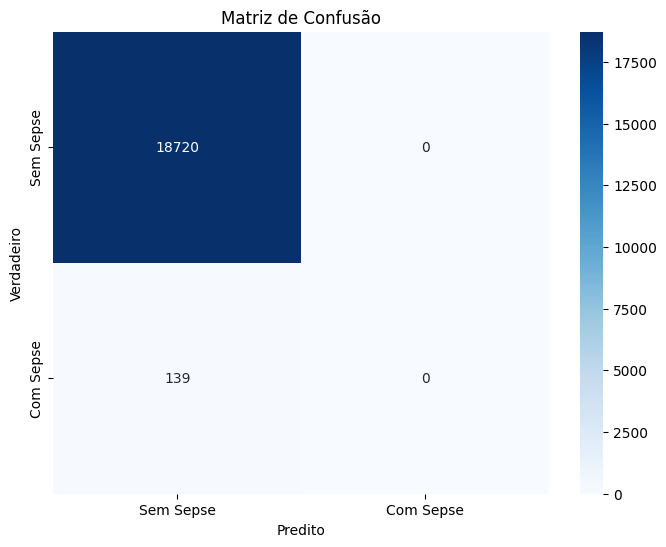

In [20]:
RandomForest(df_reg)

F1-Score: 0.0000
Acurácia: 0.9926
PPV (Precision): 0.0000
Sensibilidade (Recall): 0.0000
Especificidade: 1.0000
AUC: 0.8078
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     18720
         1.0       0.00      0.00      0.00       139

    accuracy                           0.99     18859
   macro avg       0.50      0.50      0.50     18859
weighted avg       0.99      0.99      0.99     18859

[[18720     0]
 [  139     0]]


/home/vip/grad/23/leticia.ribeiro/miniconda3/envs/uti/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vip/grad/23/leticia.ribeiro/miniconda3/envs/uti/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vip/grad/23/leticia.ribeiro/miniconda3/envs/uti/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
 

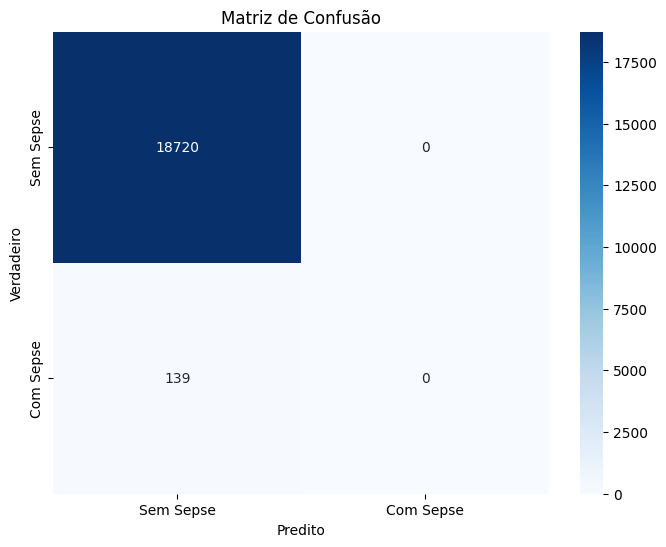

In [21]:
RandomForest_Over(df_reg)